In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Path and Dropping NaN values
path = r'C:\Users\layoc\OneDrive\Documents\VSCodeLearn\Life Expectancy Data.csv'
data = pd.read_csv(path)
cleanData = data.dropna()

#Variables for Multiple Linear Regression
X = cleanData[['Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','under-five deaths','Polio','Total expenditure',
               'Diphtheria','HIV/AIDS','GDP','Population','thinness  1-19 years','thinness 5-9 years','Income composition of resources','Schooling']]
y = cleanData[['Life expectancy']]

#train_test_split method for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [84]:
from sklearn.linear_model import LinearRegression

#creating Linear Regression Model and fitting our Training Data
model = LinearRegression()
model.fit(X_train,y_train)

coef = model.coef_
intercept = model.intercept_

#Predict method to predict life expectancy age
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"The Coefficient for the X values are: {coef}")
print(f"The Intercept is: {intercept}")

The Coefficient for the X values are: [[-1.67418670e-02  9.70628342e-02 -7.92112868e-02  4.32336088e-04
  -7.63189022e-03 -7.80576842e-06  2.65638653e-02 -7.32576205e-02
   9.37308516e-03  9.51991302e-02  1.40331191e-02 -4.32653377e-01
  -1.43514959e-07  6.10426563e-10 -4.22876707e-02 -4.84407643e-02
   8.89881085e+00  9.67414501e-01]]
The Intercept is: [53.22794644]


In [85]:
from sklearn.metrics import mean_squared_error, r2_score

#Finding MSE and R^2 on Training Data and Testing Data
mse_train = mean_squared_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error for train: {mse_train}")
print(f"R Squared for train: {r2_train}")

print(f"\nMean Squared Error for test: {mse_test}")
print(f"R Squared for test: {r2_test}")

Mean Squared Error for train: 12.661944069435675
R Squared for train: 0.8393107461074596

Mean Squared Error for test: 13.538037330586517
R Squared for test: 0.8093837827628405


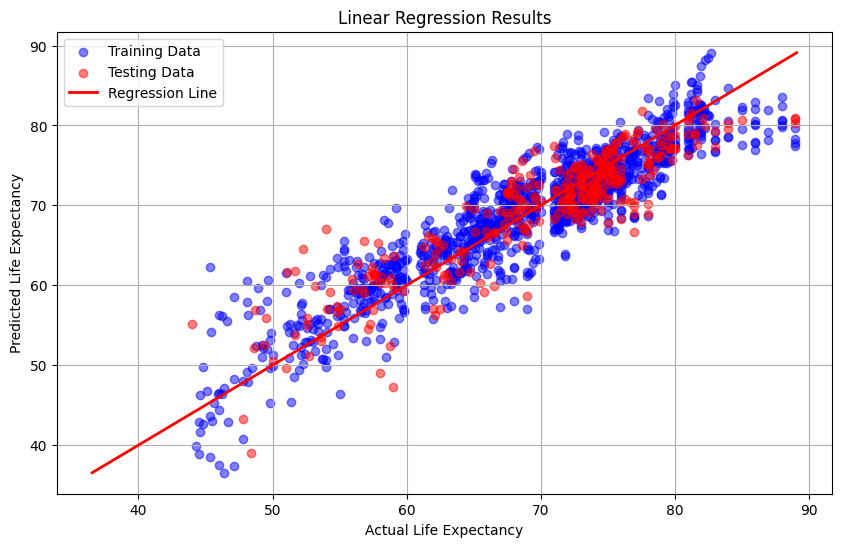

In [86]:
plt.figure(figsize=(10,6))

#Convert to Array so Matplotlib can be compatible with the Data
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train_pred = np.array(y_train_pred)
y_test_pred = np.array(y_test_pred)

#Scatter plot for both training data and testing data
plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.5)
plt.scatter(y_test, y_test_pred, label='Testing Data', color='red', alpha=0.5)

#Min and Max value for training and testing data
min_val = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
max_val = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())

#Plotting the regression line
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Regression Line')

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.title('Linear Regression Results')
plt.grid(True)
plt.show()

In [87]:
#Importing ExtraTreeRegesor so we can predict from class labels of data points instead of numerical

from sklearn.tree import DecisionTreeRegressor, plot_tree

treeExtra = DecisionTreeRegressor(
    max_depth=5,              # Set the maximum depth of the tree
    min_samples_split=5,      # Set the minimum samples required to split a node
    min_samples_leaf=2,       # Set the minimum samples required in a leaf node
    max_leaf_nodes=None,      # Limit the maximum number of leaf nodes (optional)
    min_impurity_decrease=0.0)

treeExtra.fit(X_train, y_train)

yTreeTest_pred = treeExtra.predict(X_test)

In [88]:
#MSE and R squared for test and train data for the DecisionTree
mse_treeTest = mean_squared_error(y_test, yTreeTest_pred)
r2_treeTest = r2_score(y_test, yTreeTest_pred)

print(f"Decision Tree testing data MSE: {mse_treeTest}")
print(f"Decision Tree testing R squared: {r2_treeTest}")

Decision Tree testing data MSE: 8.598027096245543
Decision Tree testing R squared: 0.8789393646384693


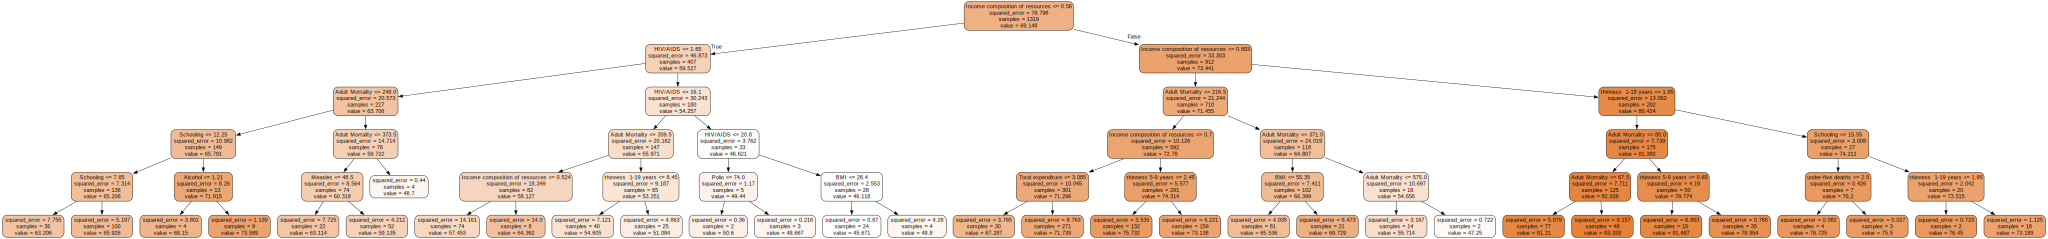

In [89]:
from graphviz import Source
from sklearn.tree import export_graphviz
import graphviz

dotData = export_graphviz(
        treeExtra,
        feature_names= X.columns,
        class_names= y,
        rounded=True,
        filled=True
    )

graphviz.Source(dotData)

In [90]:
feature_importances = treeExtra.feature_importances_

# Create a DataFrame to associate feature names with their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importances:")
print(importance_df)


Feature Importances:
                            Feature  Importance
16  Income composition of resources    0.716993
0                   Adult Mortality    0.123560
11                         HIV/AIDS    0.118403
14             thinness  1-19 years    0.014717
17                        Schooling    0.007995
15               thinness 5-9 years    0.005872
9                 Total expenditure    0.005579
6                               BMI    0.003404
5                           Measles    0.002550
2                           Alcohol    0.000853
8                             Polio    0.000047
7                 under-five deaths    0.000027
1                     infant deaths    0.000000
10                       Diphtheria    0.000000
4                       Hepatitis B    0.000000
12                              GDP    0.000000
13                       Population    0.000000
3            percentage expenditure    0.000000


In [91]:
processedCSV = pd.read_csv('Life_Expectancy_preprocessed.csv')
processedCSV.iloc[:, 1:]

processedCSV

,Unnamed: 0,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing,Life expectancy
0,0,Afghanistan,2015,263,62,0.01,71.279624,65,1154,19.1,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,False,True,65.0
1,1,Afghanistan,2014,271,64,0.01,73.523582,62,492,18.6,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,False,True,59.9
2,2,Afghanistan,2013,268,66,0.01,73.219243,64,430,18.1,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,False,True,59.9
3,3,Afghanistan,2012,272,69,0.01,78.184215,67,2787,17.6,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,False,True,59.5
4,4,Afghanistan,2011,275,71,0.01,7.097109,68,3013,17.2,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,False,True,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,2933,Zimbabwe,2004,723,27,4.36,0.000000,68,31,27.1,...,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,False,True,44.3
1645,2934,Zimbabwe,2003,715,26,4.06,0.000000,7,998,26.7,...,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,False,True,44.5
1646,2935,Zimbabwe,2002,73,25,4.43,0.000000,73,304,26.3,...,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,False,True,44.8
1647,2936,Zimbabwe,2001,686,25,1.72,0.000000,76,529,25.9,...,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,False,True,45.3


<Axes: title={'center': 'Pearson Correlation of Features'}>

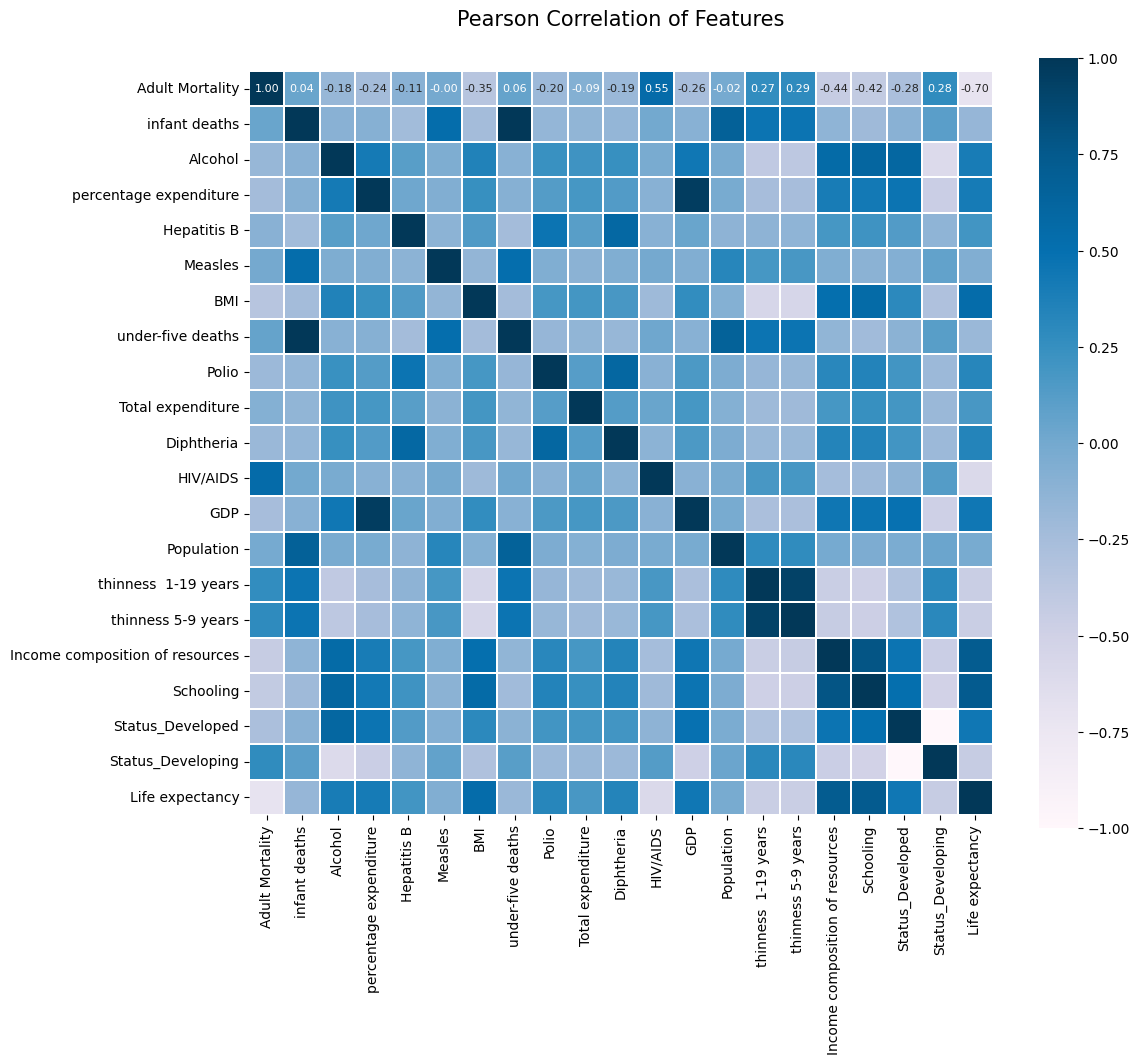

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = processedCSV.iloc[:, 3:].corr()

colormap = plt.cm.PuBu
plt.figure(figsize=(12, 10))
plt.title("Pearson Correlation of Features", y = 1.05, size = 15)
sns.heatmap(correlation_matrix, linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, fmt=".2f", annot_kws = {"size" : 8})

In [93]:
target = 'Life expectancy'
threshold = 0.4

columns_above_threshold = correlation_matrix.index[abs(correlation_matrix[target]) > threshold]

print("\nVariables whose correlation with the target variable exceeds {}:".format(threshold))
print(columns_above_threshold)



Variables whose correlation with the target variable exceeds 0.4:
Index(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'BMI',
       'HIV/AIDS', 'GDP', 'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developed',
       'Status_Developing', 'Life expectancy'],
      dtype='object')
